In [467]:
!git clone https://github.com/camillasancricca/DATADIQ.git

fatal: destination path 'DATADIQ' already exists and is not an empty directory.


In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from DATADIQ.projects.A_data_collection import make_dataset_for_classification
from DATADIQ.projects.D_data_analysis import classification
from DATADIQ.projects.E_plot_results import plot

from DATADIQ import scripts_for_E5 as s

import warnings
warnings.filterwarnings("ignore")

seed=2024

In [469]:
X, y = make_dataset_for_classification(n_samples=1000, n_features=5, n_informative=5, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, seed=seed)

df = pd.DataFrame(X)
df

,0,1,2,3,4
0,0.973723,2.804397,-0.300831,1.448791,0.553982
1,-0.958050,0.837400,0.938903,-0.545706,1.026823
2,-1.855599,-0.314043,0.126241,-2.888675,-1.110085
3,-0.093354,1.475853,1.444273,-0.480373,-2.266737
4,-0.100938,0.550623,-0.476341,-1.265839,1.399365
...,...,...,...,...,...
995,-1.498142,-1.000903,-2.849355,-3.339761,0.317906
996,2.610183,-0.963824,3.156669,-0.279722,-0.791273
997,-2.555454,1.851760,2.927063,0.148744,-1.061322
998,0.753282,-1.641176,5.510577,-1.396730,-1.304814


In [470]:
df.shape[1]

5

In [471]:
def plot_experiment(data):
    fig, axs = plt.subplots(1, 5, figsize=(20,5))

    #plot the histograms of the first 5 features of the polluted dataframe

    for i in range(df.shape[1]):
        #plot a row of histograms with the distribution of the features
        axs[i].set_title('Feature '+str(i+1))
        sns.histplot(data[i], bins=50,color='blue', kde = True, alpha=0.3, label='X', edgecolor='black', ax=axs[i])
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')
    plt.show()

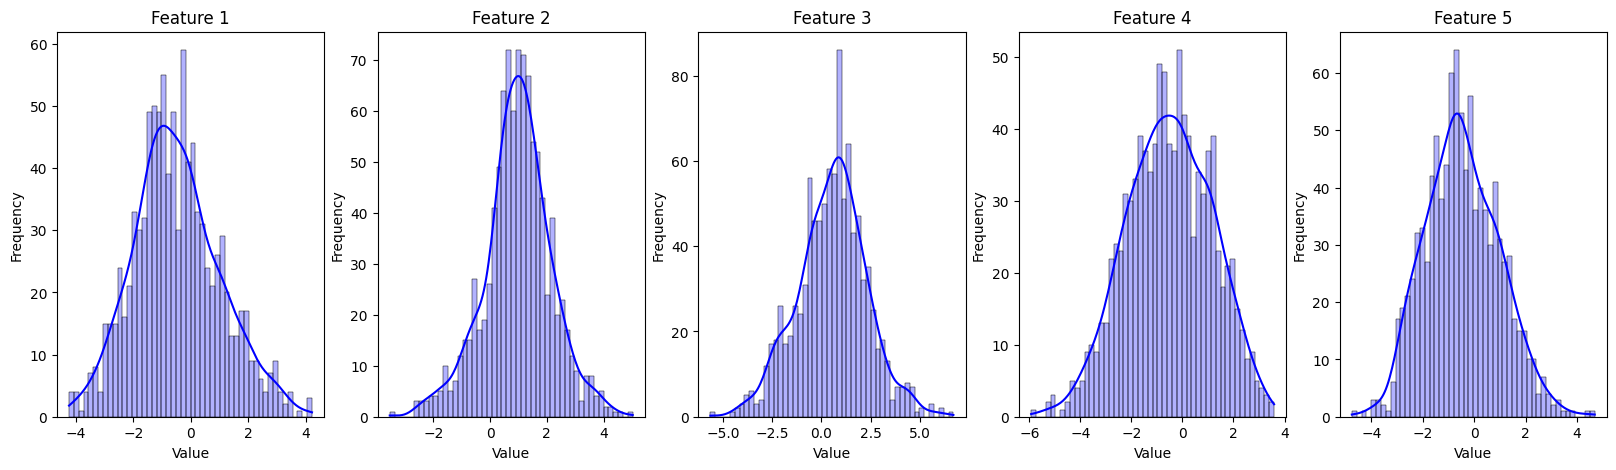

In [472]:
plot_experiment(df)


In [473]:
df.describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.485504,0.978707,0.542366,-0.517140,-0.457075
std,1.495429,1.182948,1.768717,1.668184,1.434625
min,-4.232735,-3.540325,-5.657669,-5.930186,-4.760246
25%,-1.466754,0.361620,-0.539758,-1.690305,-1.456981
50%,-0.619202,1.005620,0.652575,-0.486842,-0.551794
75%,0.403256,1.658966,1.660974,0.726299,0.530026
max,4.205882,5.026792,6.718839,3.590738,4.690179


In [474]:
CLASSIFICATION_ALGORITHMS = ["DecisionTree","LogisticRegression","KNN","RandomForest","AdaBoost", "MLP"]
'''results = []

for i in CLASSIFICATION_ALGORITHMS:
    basic_analysis = classification(X, y, i, seed=seed)
    results.append(basic_analysis)

#create a barplot with the accuracy of each algorithm
    
plt.figure(figsize=(10,5))
sns.barplot(x=CLASSIFICATION_ALGORITHMS, y=[i['mean_perf'] for i in results])
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
plt.show()'''

"results = []\n\nfor i in CLASSIFICATION_ALGORITHMS:\n    basic_analysis = classification(X, y, i, seed=seed)\n    results.append(basic_analysis)\n\n#create a barplot with the accuracy of each algorithm\n    \nplt.figure(figsize=(10,5))\nsns.barplot(x=CLASSIFICATION_ALGORITHMS, y=[i['mean_perf'] for i in results])\nplt.ylabel('Accuracy')\nplt.xlabel('Algorithm')\nplt.show()"

DATA POLLUTION

In [475]:
def pollute(data, percentage, mean, variance):
    n = int(percentage*data.shape[0])
    data_copy = data.copy()
    rows = np.random.choice(data.shape[0], n, replace=False)
    for row in rows:
        feature = np.random.choice(data.shape[1], 1)
        sign = np.random.choice([-1,1], 1)
        data_copy[row, feature] = np.mean(data[feature]) + np.random.normal(sign*mean, variance, 1)
    return data_copy

In [476]:
polluted = []

polluted.append(pollute(X, 0.05, 7, 1))
polluted.append(pollute(X, 0.05, 8, 2))
polluted.append(pollute(X, 0.1, 6, 0))
polluted.append(pollute(X, 0.1, 100, 5))
polluted.append(pollute(X, 0.25, 2, 1))
polluted.append(pollute(X, 0.3, 5, 0.5))
polluted.append(pollute(X, 0.35, 9, 0.5))
polluted.append(pollute(X, 0.4, 8, 0))
polluted.append(pollute(X, 0.5, 8, 1))
polluted.append(pollute(X, 0.5, 10, 0.5))

POLLUTED DATA ANALYSIS

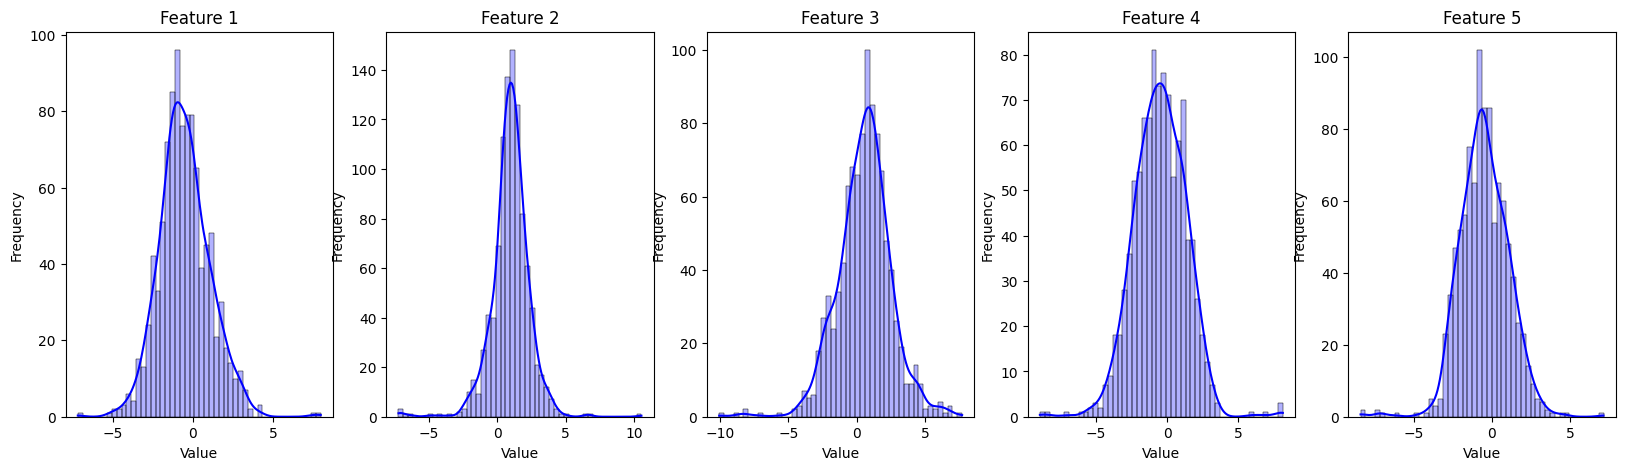

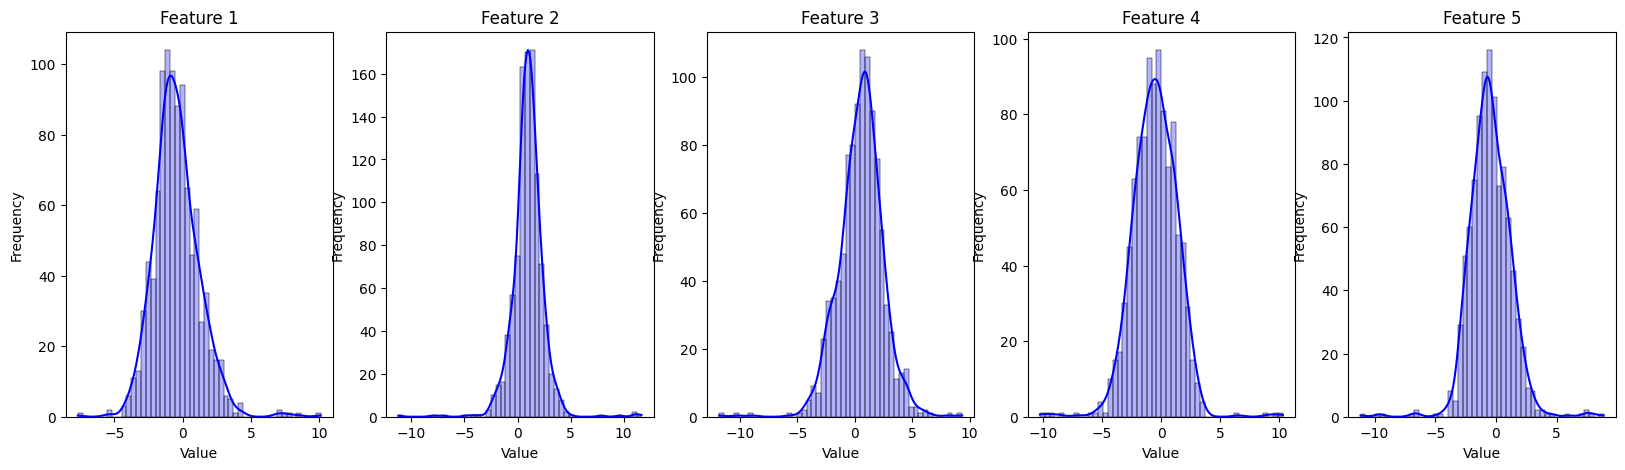

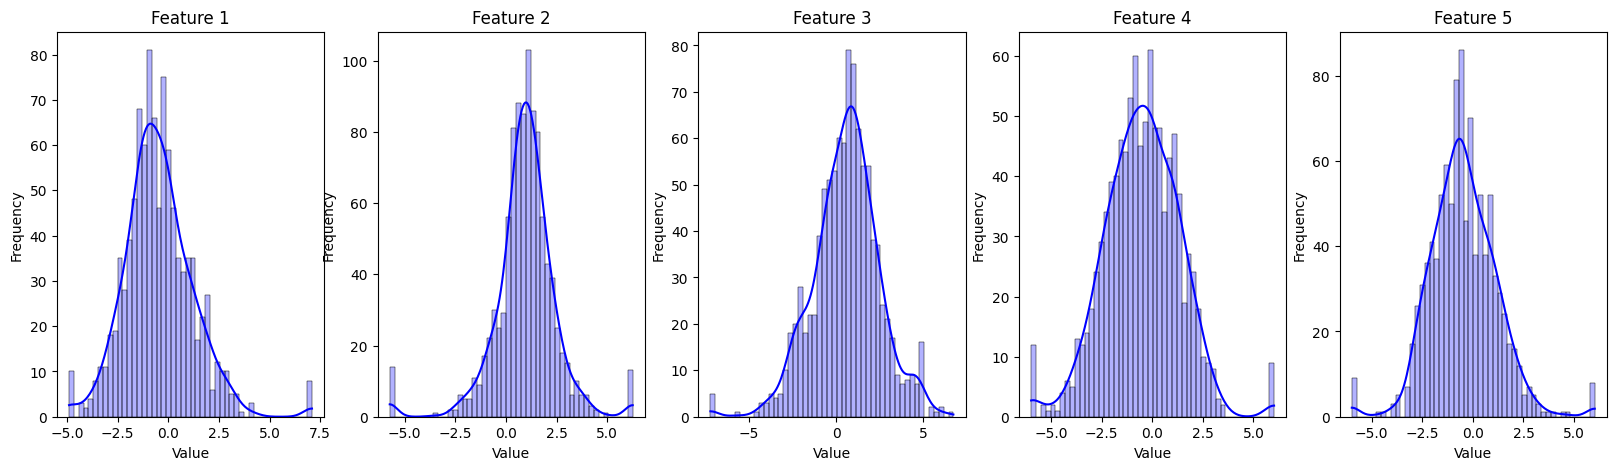

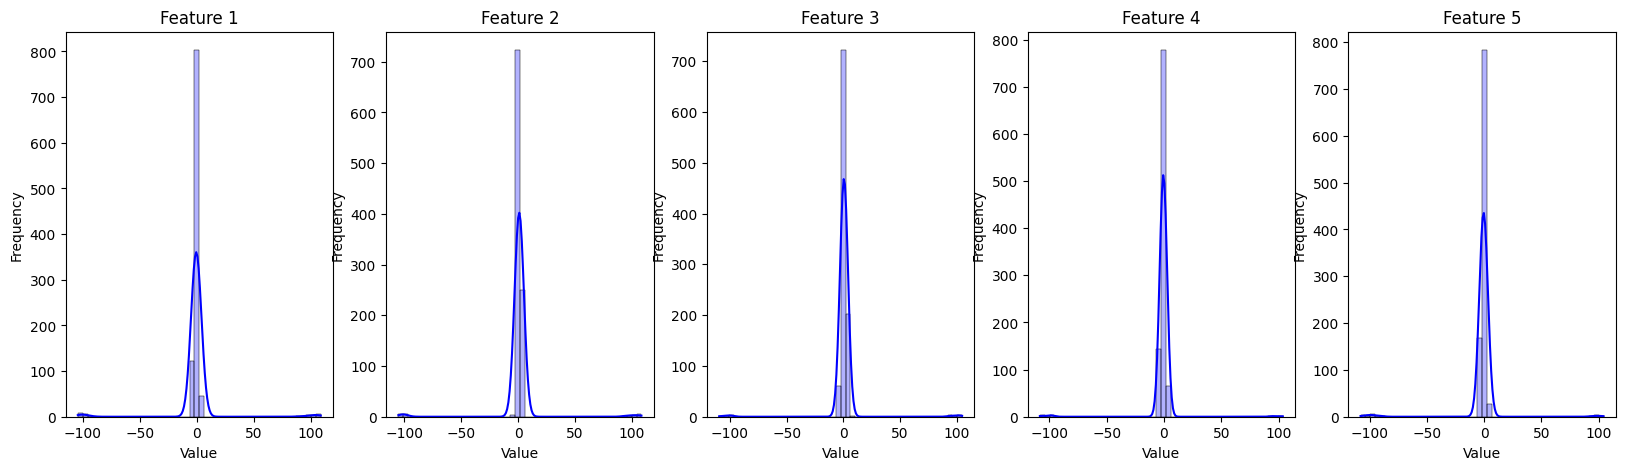

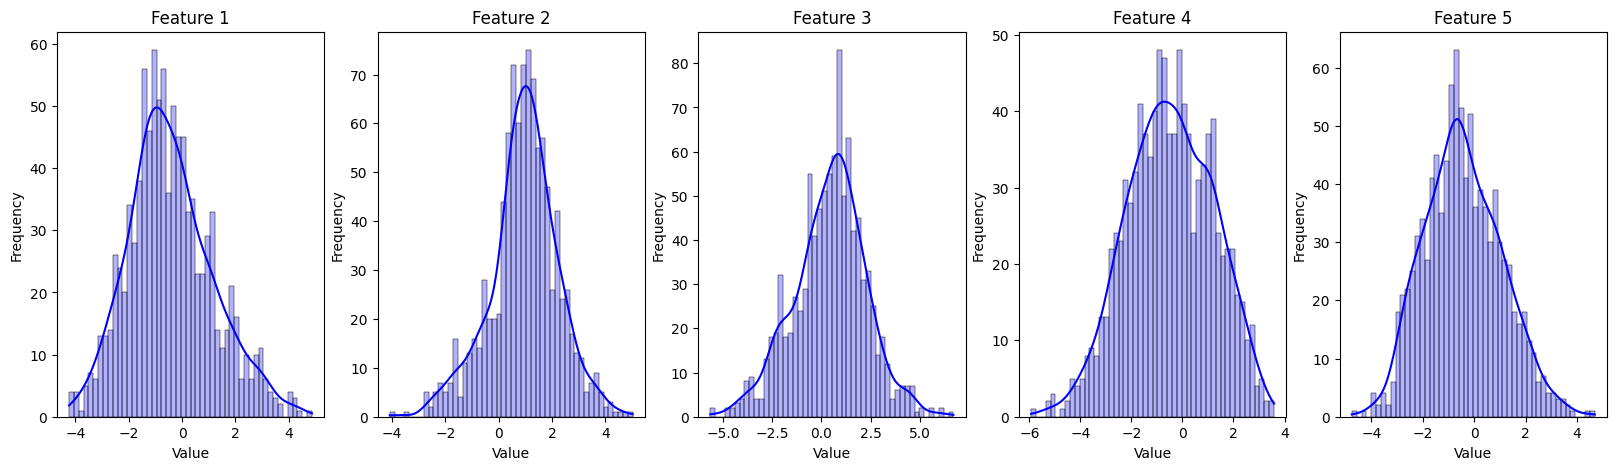

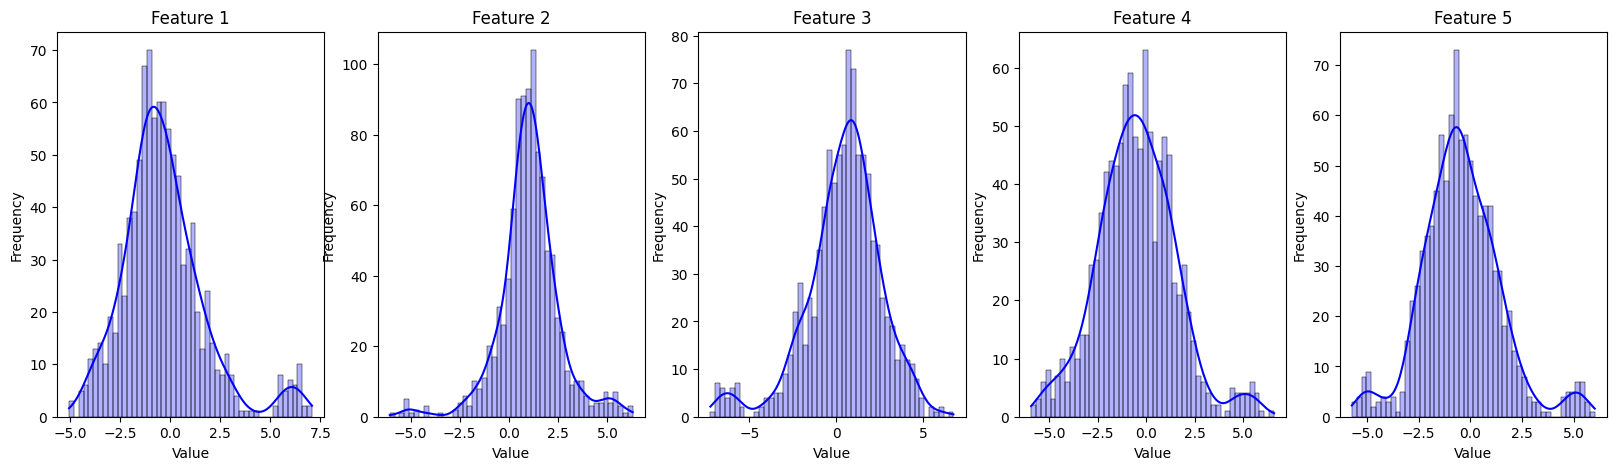

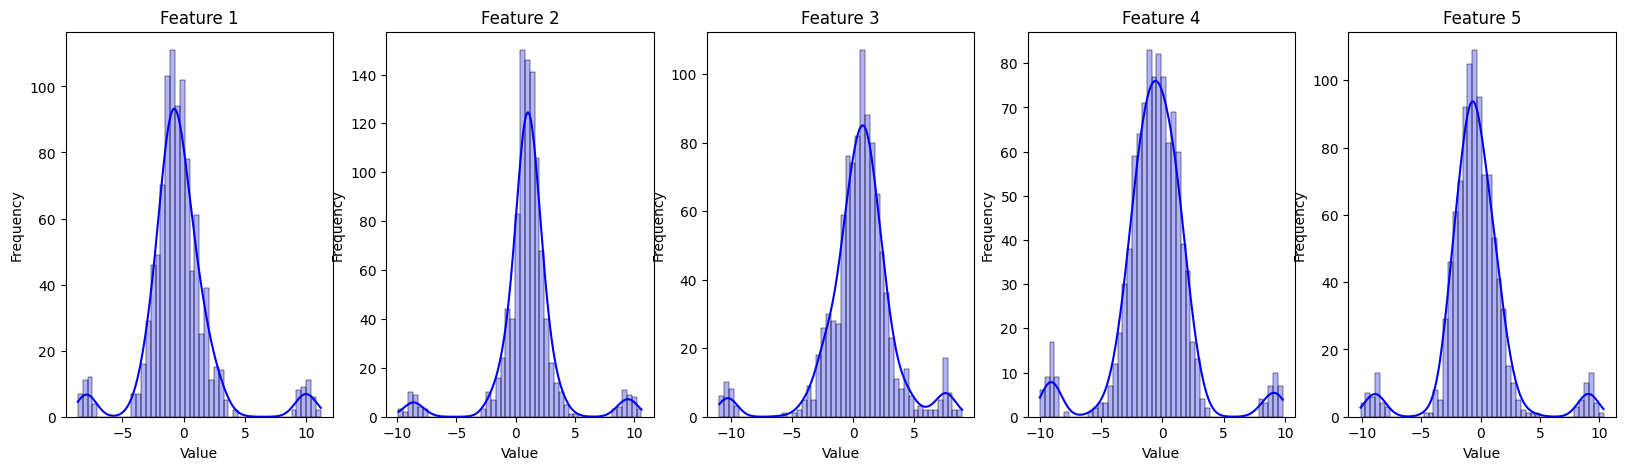

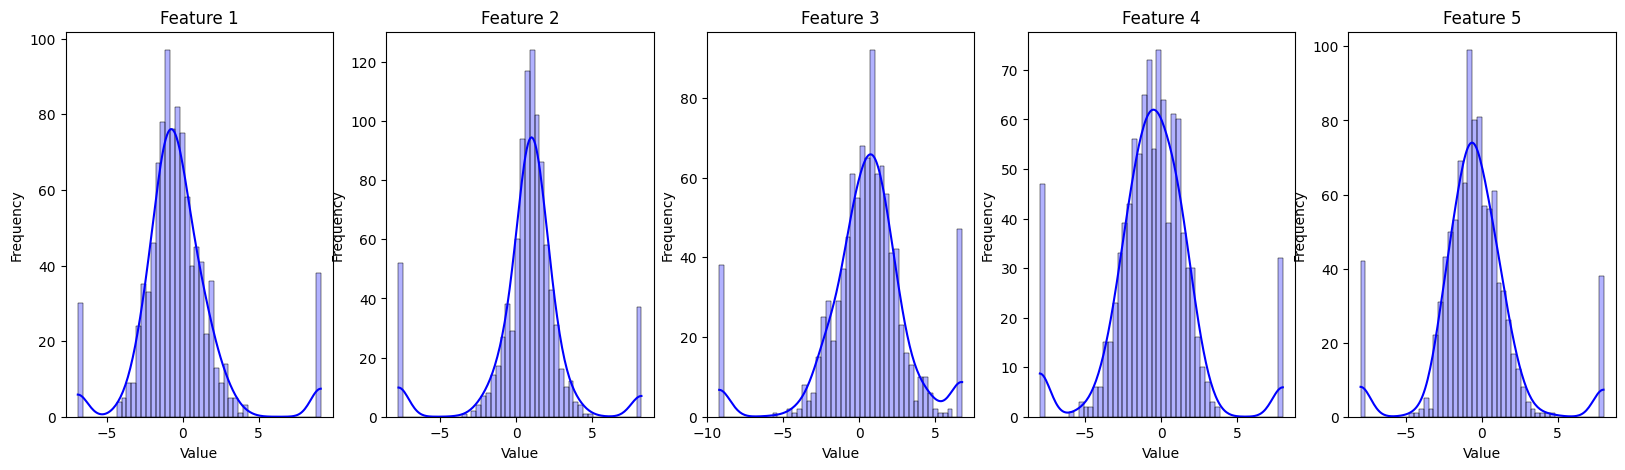

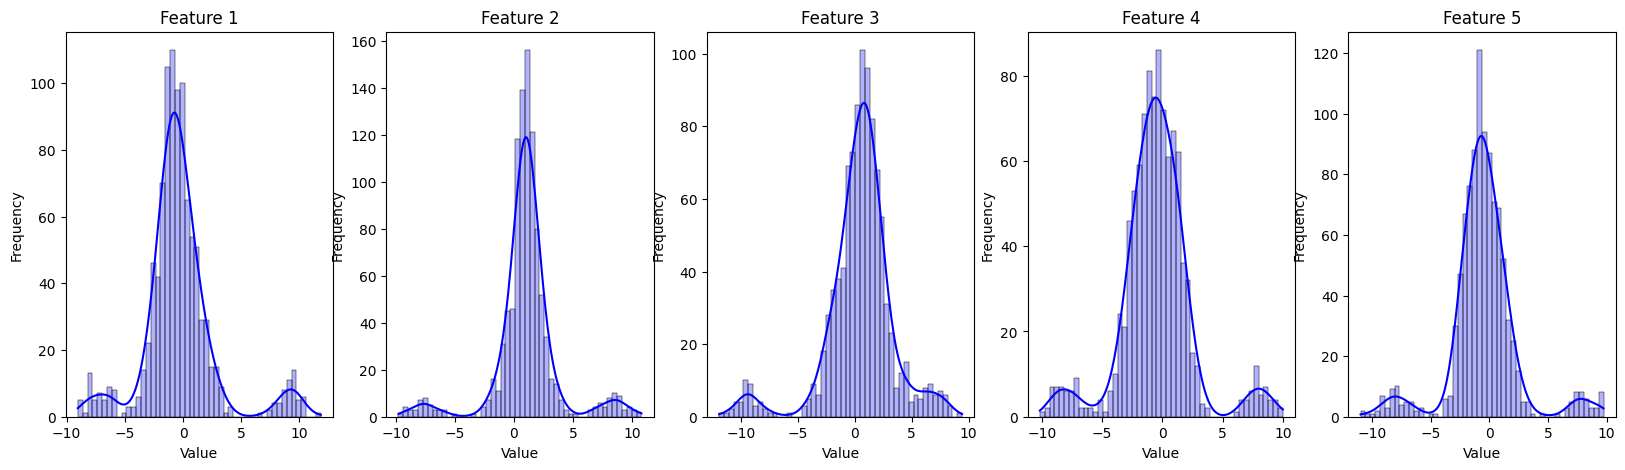

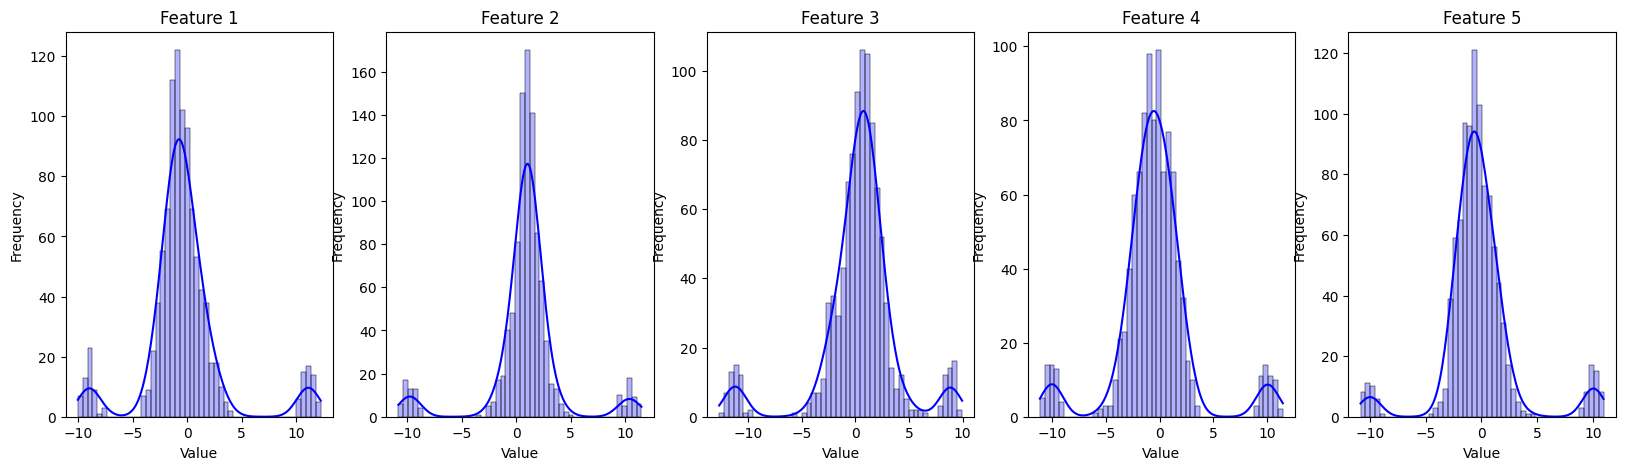

In [477]:
for data in polluted:
    plot_experiment(pd.DataFrame(data))

Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for Ra

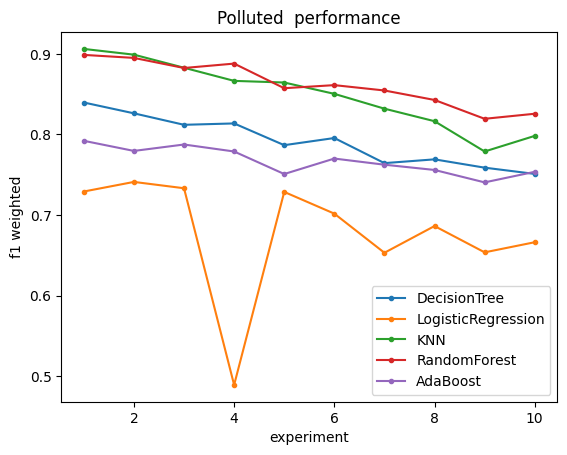

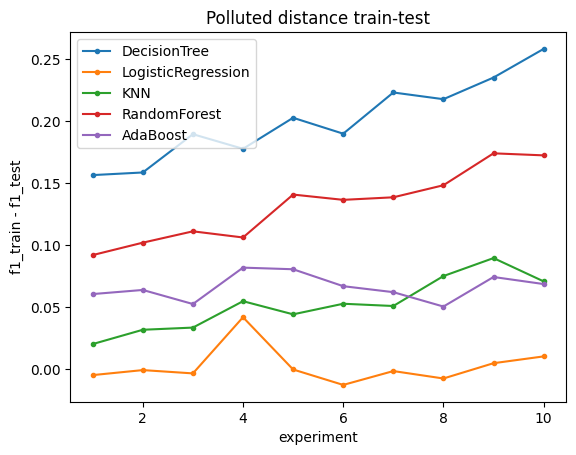

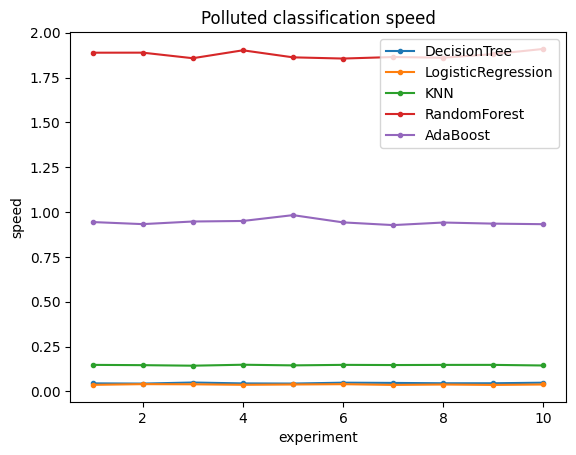

In [478]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for polluted_df in polluted: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        # DATA ANALYSIS
        results_1_analysis = classification(polluted_df, y, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Polluted  performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Polluted distance train-test", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Polluted classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

polluted_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
polluted_results_dataFrame=polluted_results_dataFrame.T
polluted_results_dataFrame=polluted_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in polluted_results_dataFrame.columns:
    polluted_performance_dataFrame = polluted_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    polluted_distance_dataFrame = polluted_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    polluted_speed_dataFrame = polluted_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)

Z-SCORE OUTLIERS DETECTION

In [479]:
def z_score(data, threshold):
    #for each column of the dataset
    for column in data.T:
        mean = np.mean(column)
        sd = np.std(column)
        outliers = []
        for i in column:
            z = (i - mean) / sd
            if abs(z) > threshold:
                outliers.append(i)
        print("The number of outlier is:", len(outliers))

In [480]:
for experiment in polluted:
    z_score(experiment,2)

The number of outlier is: 3
The number of outlier is: 11
The number of outlier is: 11
The number of outlier is: 8
The number of outlier is: 9
The number of outlier is: 7
The number of outlier is: 11
The number of outlier is: 7
The number of outlier is: 9
The number of outlier is: 13
The number of outlier is: 8
The number of outlier is: 27
The number of outlier is: 7
The number of outlier is: 9
The number of outlier is: 18
The number of outlier is: 29
The number of outlier is: 24
The number of outlier is: 15
The number of outlier is: 12
The number of outlier is: 20
The number of outlier is: 2
The number of outlier is: 3
The number of outlier is: 5
The number of outlier is: 1
The number of outlier is: 2
The number of outlier is: 27
The number of outlier is: 19
The number of outlier is: 19
The number of outlier is: 6
The number of outlier is: 14
The number of outlier is: 38
The number of outlier is: 62
The number of outlier is: 27
The number of outlier is: 40
The number of outlier is: 53


In [481]:
def delete_ZS_outliers(data, threshold):
    clean = data.copy()
    for column in clean.T:
        mean = np.mean(column)
        sd = np.std(column)
        for i, value in np.ndenumerate(column):
            z = (value - mean) / sd
            if abs(z) > threshold:
                column[i] = np.nan
    return clean

In [482]:
clean = []
 
for experiment in polluted:
    df=pd.DataFrame(delete_ZS_outliers(experiment,2))
    clean.append(df)

In [483]:
clean[0].head(20)

,0,1,2,3,4
0,0.973723,2.804397,-0.300831,1.448791,0.553982
1,-0.958050,0.837400,0.938903,-0.545706,1.026823
2,-1.855599,-0.314043,0.126241,-2.888675,-1.110085
3,-0.093354,1.475853,1.444273,-0.480373,-2.266737
4,-0.100938,0.550623,-0.476341,-1.265839,1.399365
5,0.745465,0.199635,1.705479,1.103616,-0.949220
6,-3.286867,NaN,NaN,0.172130,-1.891987
7,1.074382,3.332994,NaN,0.720950,NaN
8,-2.814013,NaN,NaN,NaN,-0.914222
9,0.971230,1.650586,2.546593,-2.133095,0.143453


DELETING ROWS WITH OUTLIERS

In [484]:
#create a copy of clean to avoid modifying the original list
clean_copy = []
for clean_df in clean:
    clean_copy.append(clean_df.copy())
for clean_df in clean_copy:
    clean_df['y']=y
    clean_df.dropna(inplace=True)

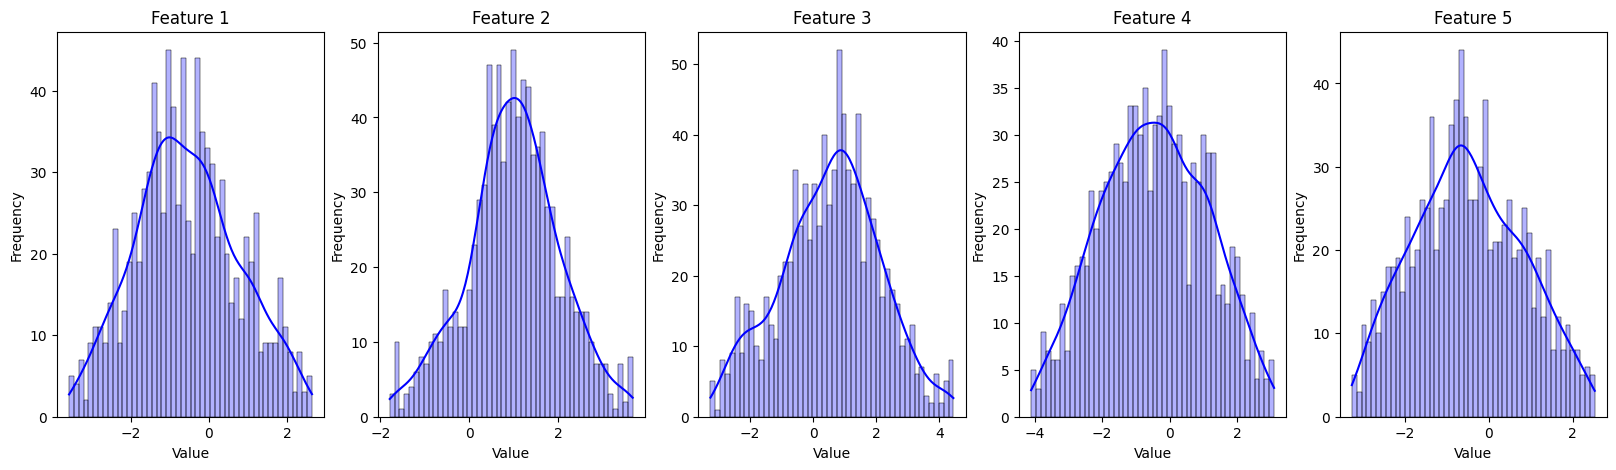

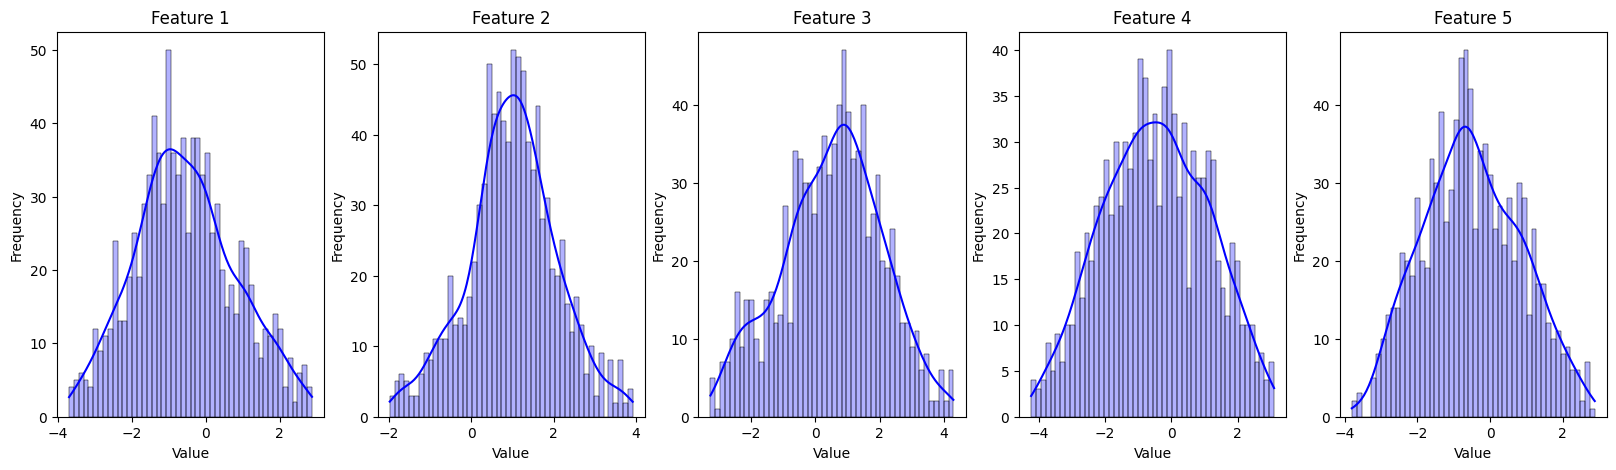

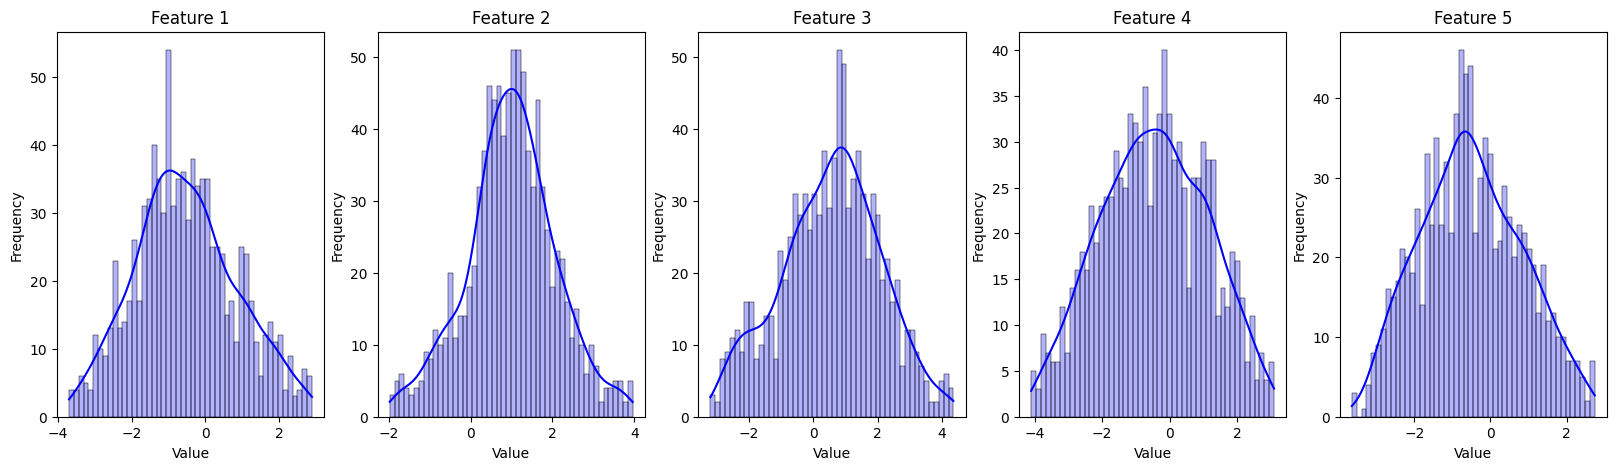

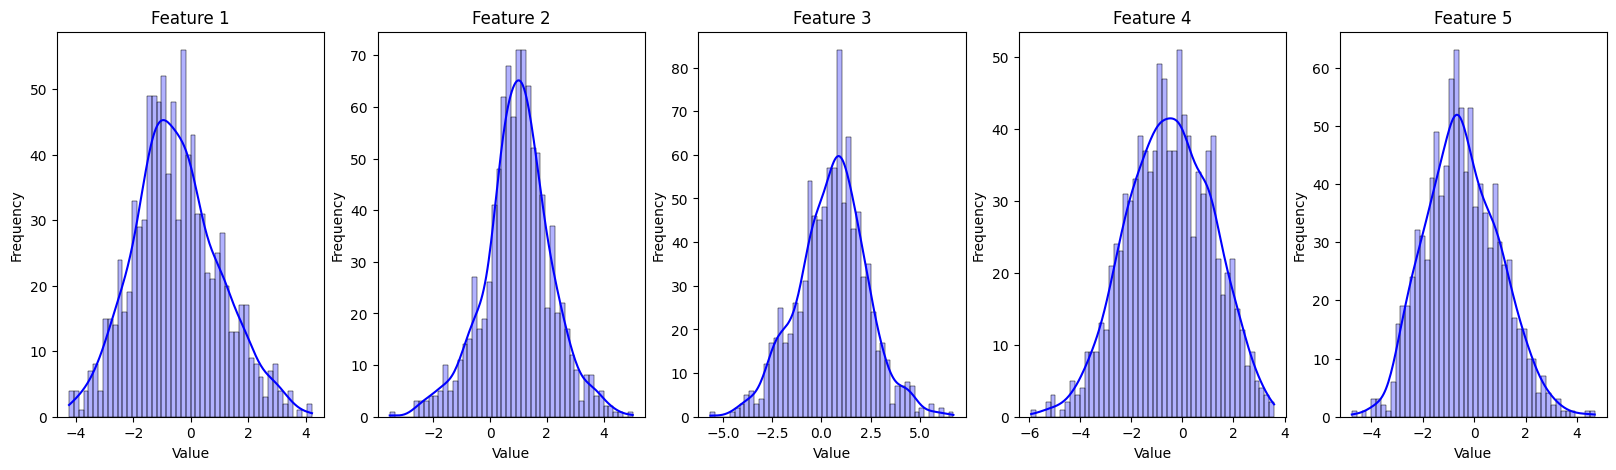

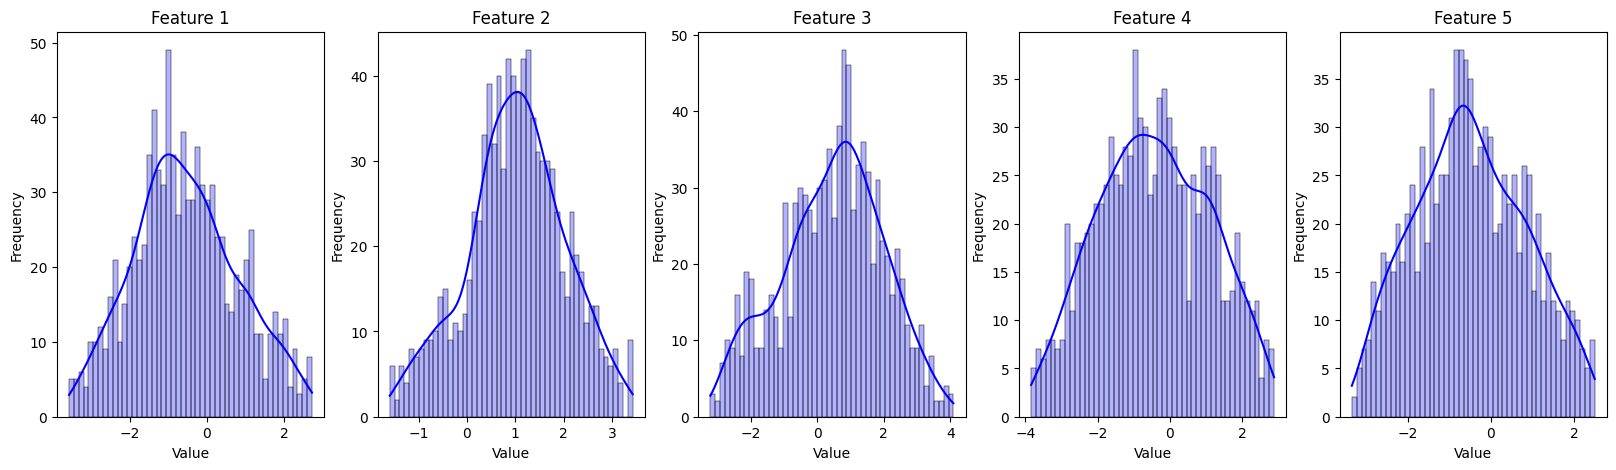

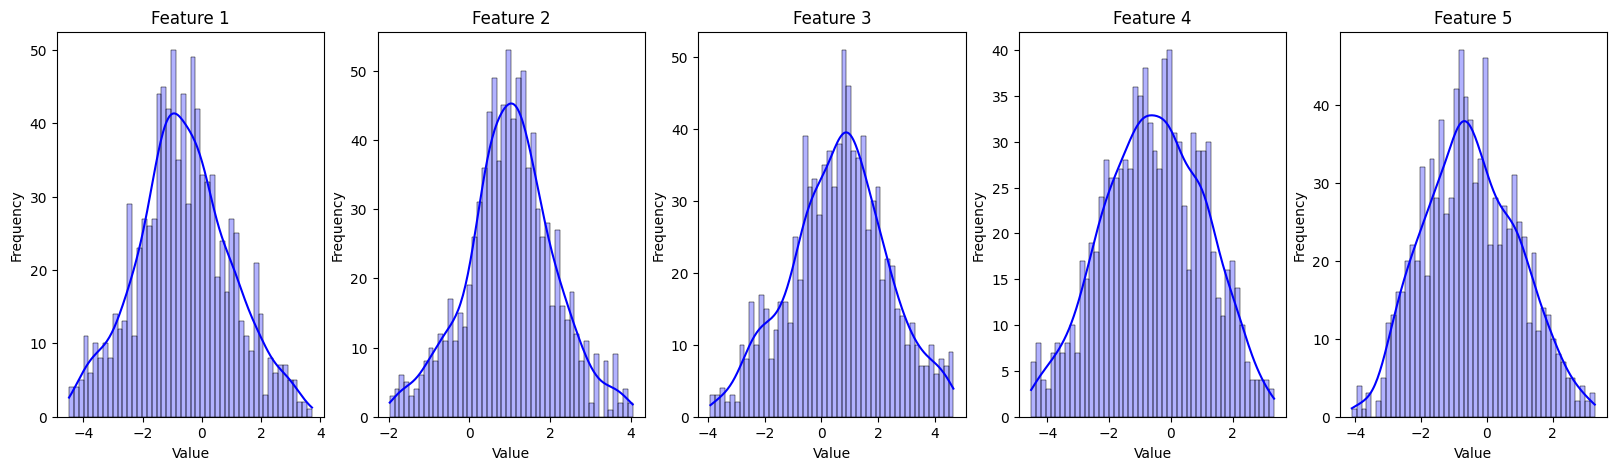

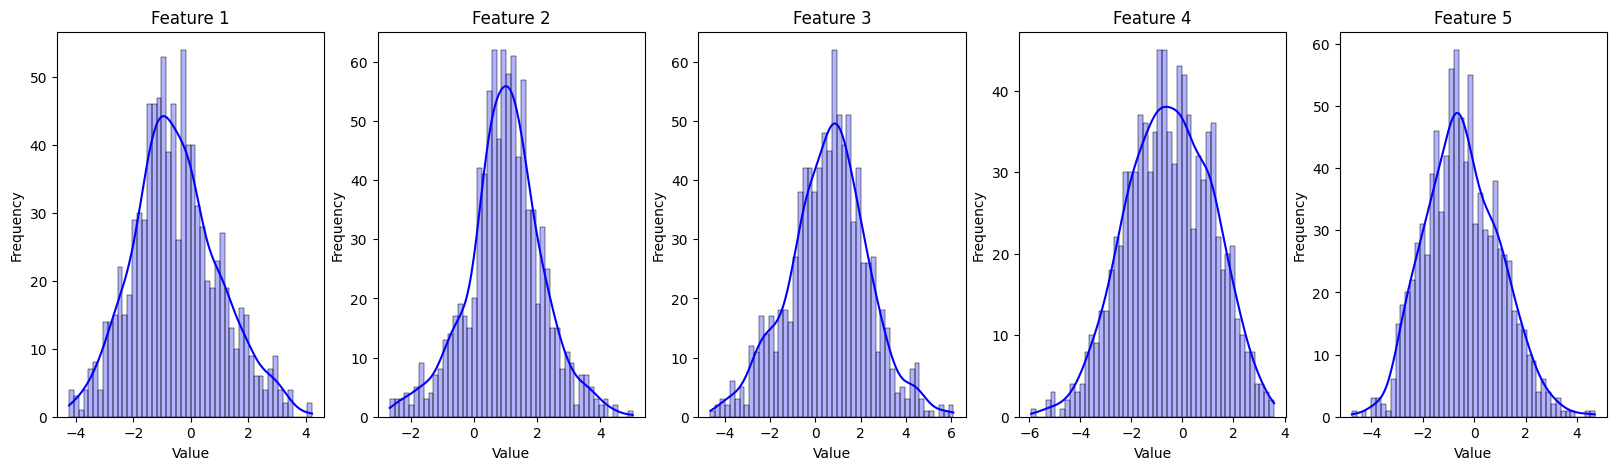

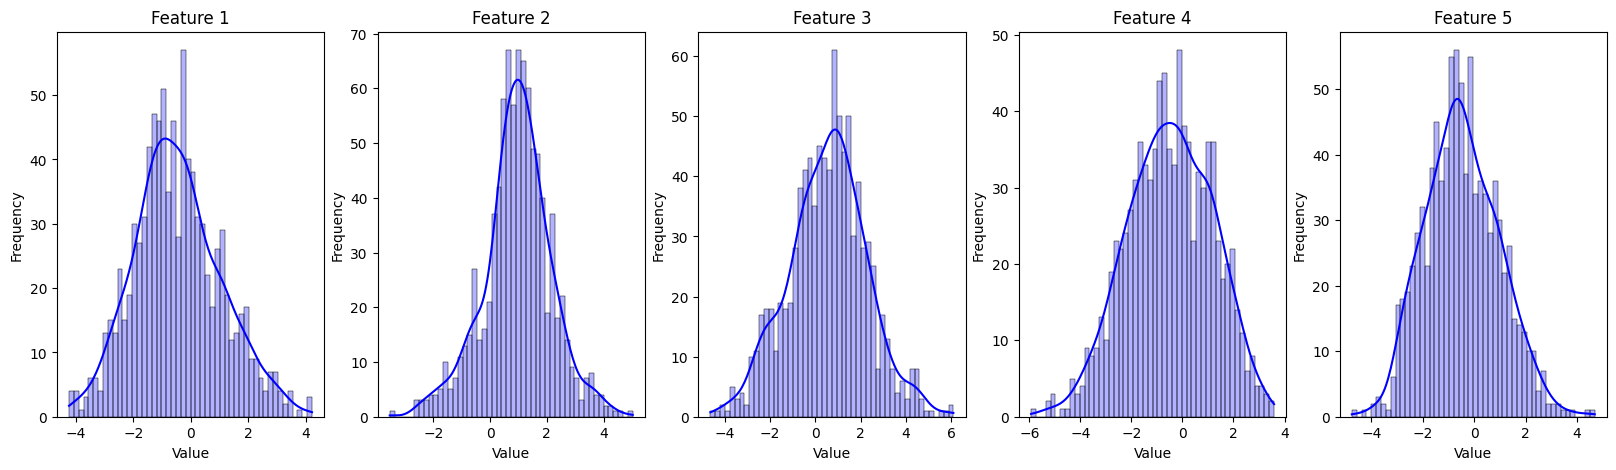

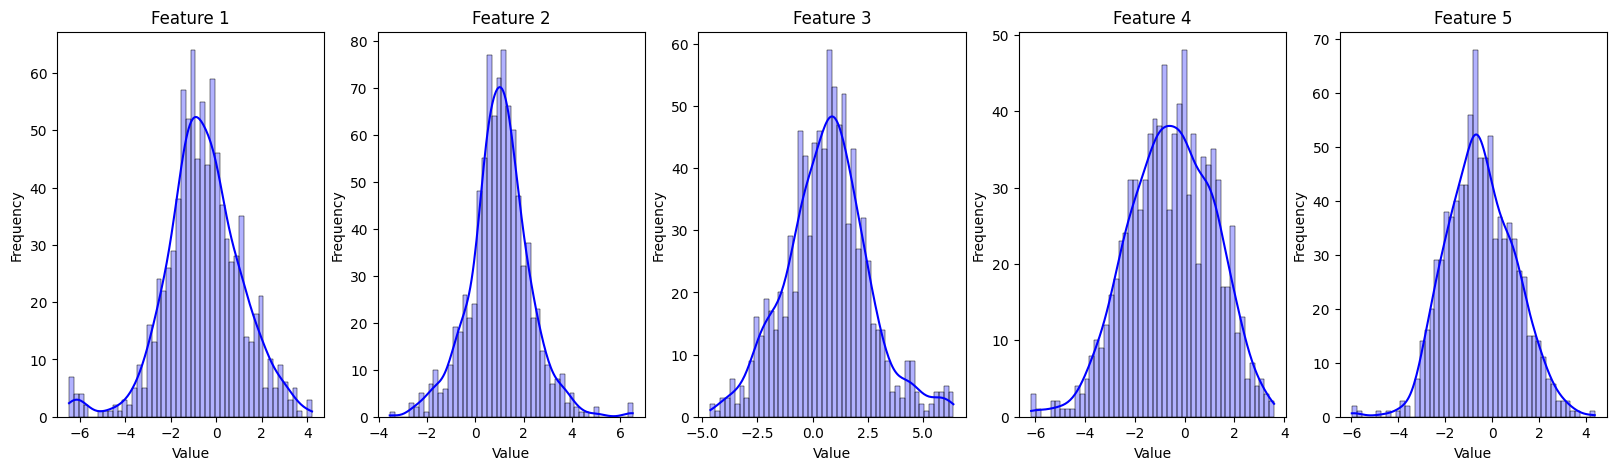

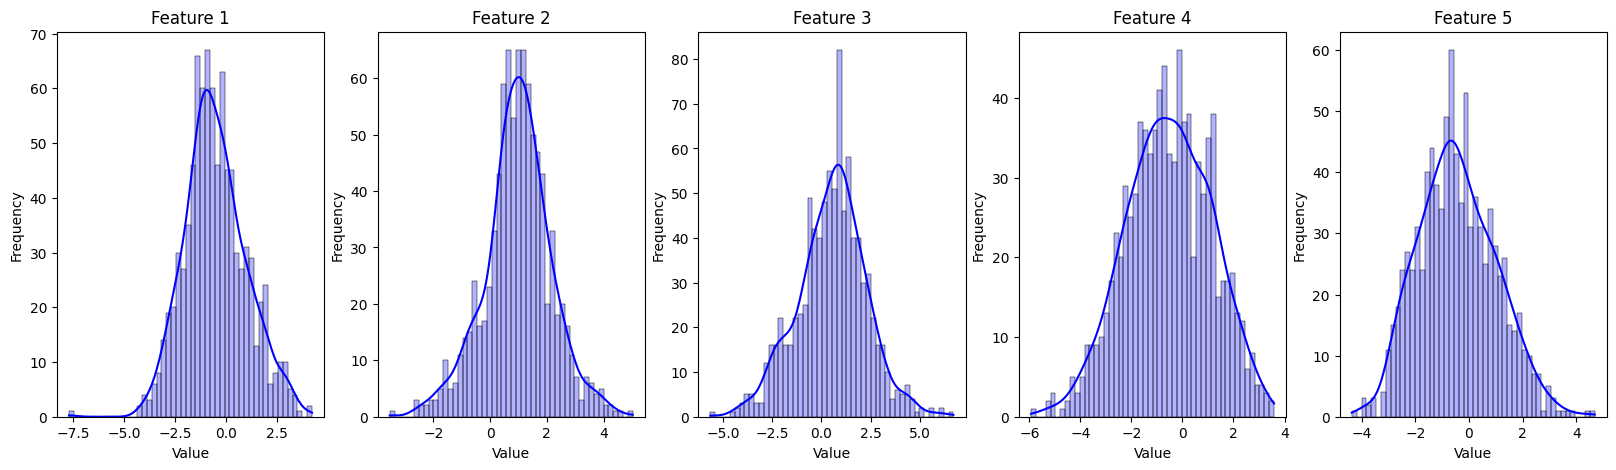

In [485]:
for data in clean:
    plot_experiment(data)

In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for clean_df in clean_copy: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        target=clean_df.y
        df=clean_df.drop('y',axis=1)
        # DATA ANALYSIS
        results_1_analysis = classification(df, target, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Dropped outliers performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Dropped outliers distance train-set", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Dropped outliers classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

dropped_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
dropped_results_dataFrame=dropped_results_dataFrame.T
dropped_results_dataFrame=dropped_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in dropped_results_dataFrame.columns:
    dropped_performance_dataFrame = dropped_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    dropped_distance_dataFrame = dropped_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    dropped_speed_dataFrame = dropped_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)

Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for DecisionTree...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for LogisticRegression...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for KNN...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...
Training for RandomForest...


USING THE MEAN

In [ ]:
clean_copy = []
for clean_df in clean:
    clean_copy.append(clean_df.copy())

for clean_df in clean_copy:
    clean_df['y']=y
    for column in clean_df.columns:
        mean_value = clean_df[column].mean()
        clean_df[column] = clean_df[column].fillna(mean_value)

In [ ]:
clean_copy[0].head(20)

In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for clean_df in clean_copy: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        target=clean_df.y
        df=clean_df.drop('y',axis=1)
        # DATA ANALYSIS
        results_1_analysis = classification(df, target, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Mean classification performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Mean classification distance train-set", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Mean classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

mean_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
mean_results_dataFrame=mean_results_dataFrame.T
mean_results_dataFrame=mean_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in mean_results_dataFrame.columns:
    mean_performance_dataFrame = mean_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    mean_distance_dataFrame = mean_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    mean_speed_dataFrame = mean_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)

# MEDIAN BASED

In [ ]:
clean_copy = []
for clean_df in clean:
    clean_copy.append(clean_df.copy())

for clean_df in clean_copy:
    clean_df['y']=y
    for column in clean_df.columns:
        median_value = clean_df[column].median()
        clean_df[column] = clean_df[column].fillna(median_value)

In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for clean_df in clean_copy: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        target=clean_df.y
        df=clean_df.drop('y',axis=1)
        # DATA ANALYSIS
        results_1_analysis = classification(df, target, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Median classification performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Median classification distance train-test", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Median classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

median_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
median_results_dataFrame=median_results_dataFrame.T
median_results_dataFrame=median_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in median_results_dataFrame.columns:
    median_performance_dataFrame = median_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    median_distance_dataFrame = median_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    median_speed_dataFrame = median_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)

# REGRESSION-BASED IMPUTATION

In [ ]:
#regression based imputation
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
def regression_imputation(data):
    imputer = IterativeImputer(estimator= LinearRegression(), max_iter=10, random_state=seed)
    imputer.fit(data)
    imputed_data = imputer.transform(data)
    imputed_data = pd.DataFrame(imputed_data)
    return imputed_data

In [ ]:
clean_copy = []
for clean_df in clean:
    clean_df_copy = clean_df.copy()
    clean_df_copy.columns=['x1','x2','x3','x4','x5']
    clean_df_copy = regression_imputation(clean_df)
    clean_copy.append(clean_df_copy)

clean_copy[0].head(20)


In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for clean_df in clean_copy: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        target=y
        #df=clean_df.drop('y',axis=1)
        # DATA ANALYSIS
        df = clean_df.copy()
        results_1_analysis = classification(df, target, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Regression based classification performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Regression based classification distance train-test", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="Regression based classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

regression_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
regression_results_dataFrame=regression_results_dataFrame.T
regression_results_dataFrame=regression_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in regression_results_dataFrame.columns:
    regression_performance_dataFrame = regression_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    regression_distance_dataFrame = regression_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    regression_speed_dataFrame = regression_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)

INTERQUARTILE RANGE OUTLIERS DETECTION

In [ ]:
def IQR(data):
    data=data.transpose()
    for column in data:
        sorted(column)
        Q1, Q3 = np.percentile(column, [25, 75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        outliers = column[((column < lower_range) | (column > upper_range))]
        # print outliers
        print("The detected outliers are: ", str(outliers))
        print("The number of outlier was:", len(outliers))

In [ ]:
def delete_IQR_outliers(data):
    for column in data.transpose():
        sorted(column)
        Q1, Q3 = np.percentile(column, [25, 75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.25 * IQR)
        upper_range = Q3 + (1.25 * IQR)
        column[((column < lower_range) | (column > upper_range))] = np.nan

    return data

In [ ]:
clean=pd.DataFrame(delete_IQR_outliers(polluted[0]))
clean.head(20)

In [ ]:
IQR_clean = []
 
for experiment in polluted:
    df=pd.DataFrame(delete_IQR_outliers(experiment))
    IQR_clean.append(df)

In [ ]:
for data in IQR_clean:
    plot_experiment(data)

In [ ]:
clean_copy = []
for clean_df in IQR_clean:
    clean_copy.append(clean_df.copy())

for clean_df in clean_copy:
    clean_df['y']=y
    for column in clean_df.columns:
        median_value = clean_df[column].median()
        clean_df[column] = clean_df[column].fillna(median_value)

In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for clean_df in clean_copy: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        target=clean_df.y
        df=clean_df.drop('y',axis=1)
        # DATA ANALYSIS
        results_1_analysis = classification(df, target, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="IQR based classification performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="IQR based classification distance train-test", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="IQR based classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

IQR_median_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
IQR_median_results_dataFrame=IQR_median_results_dataFrame.T
IQR_median_results_dataFrame=IQR_median_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in IQR_median_results_dataFrame.columns:
    IQR_median_performance_dataFrame = IQR_median_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    IQR_median_distance_dataFrame = IQR_median_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    IQR_median_speed_dataFrame = IQR_median_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)

In [ ]:
clean_copy = []
for clean_df in IQR_clean:
    clean_copy.append(clean_df.copy())

for clean_df in clean_copy:
    clean_df['y']=y
    clean_df = clean_df.dropna(axis=0)

In [ ]:
results_for_each_algorithm = []
for algorithm in CLASSIFICATION_ALGORITHMS: # FIRST CICLE ON THE ALGORITHMS

    results_single_algorithm = []

    for clean_df in clean_copy: # SECOND CICLE ON THE NUMBER OF POLLUTED DATASET THAT YOU WANT TO CREATE WITH DIFFERENT % OF POLLUTION
        target=clean_df.y
        df=clean_df.drop('y',axis=1)
        # DATA ANALYSIS
        results_1_analysis = classification(df, target, algorithm, seed)
        results_single_algorithm.append(results_1_analysis)

    results_for_each_algorithm.append(results_single_algorithm)

# RESULTS EVALUATION
#EXAMPLE FOR USING THE SCRIPTS TO PLOT THE RESULTS
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="IQR based classification performance", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="performance")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="IQR based classification distance train-test", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="distance train-test")
plot(x_axis_values=[1,2,3,4,5,6,7,8,9,10], x_label="experiment", results=results_for_each_algorithm, title="IQR based classification speed", algorithms=CLASSIFICATION_ALGORITHMS, plot_type="speed")

IQR_median_results_dataFrame=pd.DataFrame(results_for_each_algorithm,columns=range(10))
IQR_median_results_dataFrame=IQR_median_results_dataFrame.T
IQR_median_results_dataFrame=IQR_median_results_dataFrame.rename({0:"DecisionTree",1:"LogisticRegression",
                                                    2:"KNN",3:"RandomForest",
                                                    4:"AdaBoost",5:"MLP"}, axis='columns')
for col in IQR_median_results_dataFrame.columns:
    IQR_median_performance_dataFrame = IQR_median_results_dataFrame.applymap(lambda x: x['mean_perf'] if isinstance(x, dict) else x)
    IQR_median_distance_dataFrame = IQR_median_results_dataFrame.applymap(lambda x: x['distance'] if isinstance(x, dict) else x)
    IQR_median_speed_dataFrame = IQR_median_results_dataFrame.applymap(lambda x: x['speed'] if isinstance(x, dict) else x)